# Market Fire Outbreak Analysis Report

# Overview


The market fires dataset is study on some cases market fires in Nigeria around the year 2020. There are about twenty columns present in this set that describe the name, location, cause and control of each fire outbreak. This analysis looks towards drawing conclusions on and raising possible solutions to market fires in Nigeria. Dataset credit: Chibuzor Nwachukwu.

### Introduction


Market fire outbreaks pose significant risks to the safety and economy of communities. As stakeholders invested in ensuring the well-being and resilience of our markets, it's crucial to understand the patterns, causes, and responses to these incidents. This report presents an analysis of market fire outbreaks based on available data, aiming to inform stakeholders about key insights and potential actions to enhance fire safety measures and emergency response.

I would be conducting exploratory data analysis to gain insights into the patterns, trends, and factors associated with market fire outbreaks in the dataset.
1. **Temporal Analysis:**
   - How many incidents occurred each month?
   - Is there a seasonal pattern in market fire outbreaks?

2. **Geographical Analysis:**
   - Which states and regions have the highest number of market fire outbreaks?
   - Are there any specific local government areas (LGAs) or cities with a higher incidence of market fires?

3. **Market Type Analysis:**
   - What types of markets are most commonly affected by fires?
   - Are certain market types more prone to fire incidents compared to others?

4. **Causes of Fire Analysis:**
   - What are the primary reported causes of market fires?
   - Are there any recurring causes of fire incidents?

5. **Response and Damage Assessment:**
   - How effective is the response in extinguishing fires?
   - What is the estimated loss in monetary terms due to each fire incident?

6. **Safety Measures:**
   - How frequently are fire extinguishers effectively used during fire incidents?
   - Are there any notable incidents where the use of fire extinguishers contributed to mitigating fire damage?

7. **Fatalities and Looting Analysis:**
   - How many incidents resulted in fatalities or casualties?
   - Is there a correlation between incidents involving looting and the severity of fire damage?

8. **Longitudinal Analysis:**
   - Are there any trends or changes in the frequency or severity of market fire outbreaks over time?
   - Have any preventive measures been implemented in response to previous incidents, and have they been effective?

9. **Media Coverage and Reporting:**
   - What is the extent of media coverage for each fire incident?
   - Are there any discrepancies between reported incidents and actual occurrences?

10. **Insurance and Compensation:**
    - How many affected markets were covered by insurance, and what was the extent of compensation received?
    - What are the challenges faced by market owners in securing insurance coverage and compensation for fire damage?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Wrangling

In [2]:
# Load dataset
df = pd.read_csv('Market FireS Dataset.csv')

In [3]:
df.head(5)

,Identifier,Date of Fire,Market Name,Src,State,Region,Type of Market,LGA,Actual Start Location,Fire put out by,Reported Start Time,Reported Time Put Out,Fatalities,Looting,Reported Causes,Recurring?,When,Recurring src,Estimated Loss NGN,Effective Use of Fire Extinguishers
0,NaN,31-Dec-19,Oja Bisi Market,https://www.voiceairmedia.com/2019/12/few-hour...,Ekiti State,South-West,General Goods,Ado Ekiti,Unspecified,Firefighters,NaN,NaN,Unknown,Unknown,Generator Fire,No,N/a,NaN,Undisclosed,NaN
1,NaN,1-Jan-20,Timber section Industrial Market Umuahia,https://punchng.com/fire-destroys-umuahia-indu...,Abia State,South-East,Timber Market,Umuahia,Timber Section,Firefighters,NaN,NaN,No,Unknown,NaN,Yes,29-Jan-10,https://allafrica.com/stories/201002030633.html,"10,000,000.00",NaN
2,NaN,3-Jan-20,Amassoma NDU Shopping complex,https://www.vanguardngr.com/2020/01/fire-destr...,Bayelsa State,South-South,Roadside Shops,Southern Ijaw LGA,Shopping complex,Traders,4:00 PM,NaN,No,Unknown,Refuse Fire,No,N/a,NaN,Undisclosed,NaN
3,NaN,3-Jan-20,Ogbete Market,https://www.vanguardngr.com/2020/01/breaking-f...,Enugu State,South-East,General Goods,Enugu North LG,Foam Shop,Firefighters,2:00 PM,NaN,No,No,Generator Fire,No,N/a,NaN,Undisclosed,Yes
4,NaN,5-Jan-20,Akesan Market,https://guardian.ng/news/traders-count-losses-...,Oyo State,South-West,General Goods,Oyo East LGA,Unspecified,Firefighters,12:30 AM,NaN,Yes,Yes,Unknown,No,N/a,NaN,"20,000,000,000.00",No


In [4]:
df.shape

(20, 20)

# Data Cleaning

### Drop some column(s)

In [5]:
columns_to_drop = ['Identifier','Reported Start Time','Reported Time Put Out']
df.drop(columns_to_drop,1,inplace=True)

### Rename column

In [6]:
# Rename the column from 'Estimated Loss (N) ' to 'Estimated Loss NGN' This was done mannually.
# df = df.rename(columns={'Estimated Loss (N) ': 'Estimated Loss NGN'})

# Rename the column from 'Region ' to 'Region'
df = df.rename(columns={'Region ': 'Region'})

### Change index to start with 1.

In [7]:
df.index = np.arange(1, len(df)+1)

### Check for duplicate values

In [8]:
df.duplicated().sum()

0

### Change the format of Date of Fire

In [9]:
df['Date of Fire'] = pd.to_datetime(df['Date of Fire'])
# confirm format change
df.head(20)


,Date of Fire,Market Name,Src,State,Region,Type of Market,LGA,Actual Start Location,Fire put out by,Fatalities,Looting,Reported Causes,Recurring?,When,Recurring src,Estimated Loss NGN,Effective Use of Fire Extinguishers
1,2019-12-31,Oja Bisi Market,https://www.voiceairmedia.com/2019/12/few-hour...,Ekiti State,South-West,General Goods,Ado Ekiti,Unspecified,Firefighters,Unknown,Unknown,Generator Fire,No,N/a,NaN,Undisclosed,NaN
2,2020-01-01,Timber section Industrial Market Umuahia,https://punchng.com/fire-destroys-umuahia-indu...,Abia State,South-East,Timber Market,Umuahia,Timber Section,Firefighters,No,Unknown,NaN,Yes,29-Jan-10,https://allafrica.com/stories/201002030633.html,"10,000,000.00",NaN
3,2020-01-03,Amassoma NDU Shopping complex,https://www.vanguardngr.com/2020/01/fire-destr...,Bayelsa State,South-South,Roadside Shops,Southern Ijaw LGA,Shopping complex,Traders,No,Unknown,Refuse Fire,No,N/a,NaN,Undisclosed,NaN
4,2020-01-03,Ogbete Market,https://www.vanguardngr.com/2020/01/breaking-f...,Enugu State,South-East,General Goods,Enugu North LG,Foam Shop,Firefighters,No,No,Generator Fire,No,N/a,NaN,Undisclosed,Yes
5,2020-01-05,Akesan Market,https://guardian.ng/news/traders-count-losses-...,Oyo State,South-West,General Goods,Oyo East LGA,Unspecified,Firefighters,Yes,Yes,Unknown,No,N/a,NaN,"20,000,000,000.00",No
6,2020-01-11,Onitsha Spare Parts Market Awada,https://tribuneonlineng.com/one-collapses-as-f...,Anambra State,South-East,Spare Parts,Onitsha South LGA,Unspecified,Firefighters,Unknown,Unknown,"Electrical - Power Surge/Power Restoration, Bu...",No,N/a,NaN,Undisclosed,No
7,2020-01-12,Mgbuka Obosi Motor Spare Parts Market,https://www.vanguardngr.com/2020/01/traders-co...,Anambra State,South-East,Spare Parts,Idemili North LGA,Unspecified,Firefighters,Unknown,Unknown,"Electrical - Power Surge/Power Restoration, Bu...",No,N/a,NaN,Undisclosed,No
8,2020-01-13,Kugbo Furniture Market,https://punchng.com/fire-guts-50-shops-in-fct-...,Abuja,North-Central,Furniture Market,Abuja Municipal Area,Unspecified,Firefighters,Unknown,Unknown,Unknown,Yes,21-Feb-13,http://saharareporters.com/2013/02/21/tragedy-...,"25,000,000.00",No
9,2020-01-25,"Amu Plank Market, Mushin",https://guardian.ng/news/goods-worth-billions-...,Lagos State,South-West,Timber Market,Alimosho LGA,Unspecified,Firefighters,no,Unknown,Unknown,No,N/a,NaN,Undisclosed,No
10,2020-01-28,"Sabo Market, Sagamu",http://saharareporters.com/2020/01/28/sabo-mar...,Ogun State,South-West,General Goods,Sagamu,Fabric Section,Firefighters,Unknown,No,Electrical - Power Surge/Power Restoration,No,N/a,NaN,Undisclosed,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date of Fire                         20 non-null     datetime64[ns]
 1   Market Name                          20 non-null     object        
 2   Src                                  19 non-null     object        
 3   State                                20 non-null     object        
 4   Region                               20 non-null     object        
 5   Type of Market                       19 non-null     object        
 6   LGA                                  20 non-null     object        
 7   Actual Start Location                19 non-null     object        
 8   Fire put out by                      19 non-null     object        
 9   Fatalities                           19 non-null     object        
 10  Looting         

# Exploratory Data Analysis (EDA)

### 1. Temporal Analysis:

- How many incidents occurred each month?
- Is there a seasonal pattern in market fire outbreaks?

In [11]:
# 1. Temporal Analysis
# Number of incidents per month
df['Date of Fire'] = pd.to_datetime(df['Date of Fire'])
monthly_incidents = df['Date of Fire'].dt.to_period('M').value_counts().sort_index()

In [12]:
# Displaying the results
print("1. Temporal Analysis:")
print(monthly_incidents)


1. Temporal Analysis:
2019-12     1
2020-01    10
2020-02     9
Freq: M, Name: Date of Fire, dtype: int64


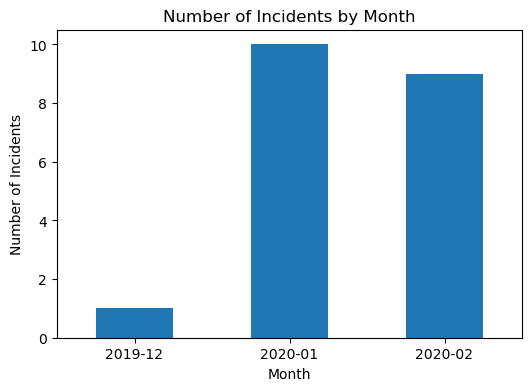

In [13]:
# Monthly Incidents
plt.figure(figsize=(6, 4))
monthly_incidents.plot(kind='bar')
plt.title('Number of Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.show()

### 2. Geographical Analysis:

- Which states and regions have the highest number of market fire outbreaks?
- Are there any specific local government areas (LGAs) or cities with a higher incidence of market fires?

In [14]:
# 2. Geographical Analysis
incidents_by_state = df['State'].value_counts()
incidents_by_region = df['Region'].value_counts()


2. Geographical Analysis:
Incidents by State:
 Lagos State      4
Enugu State      3
Anambra State    3
Abuja            2
Osun State       2
Ekiti State      1
Abia State       1
Bayelsa State    1
Oyo State        1
Ogun State       1
Ebonyi State     1
Name: State, dtype: int64

Incidents by Region:
 South-West       9
South-East       8
North-Central    2
South-South      1
Name: Region, dtype: int64


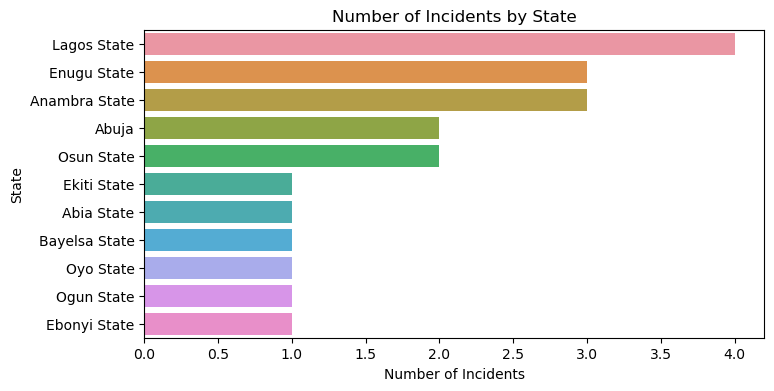

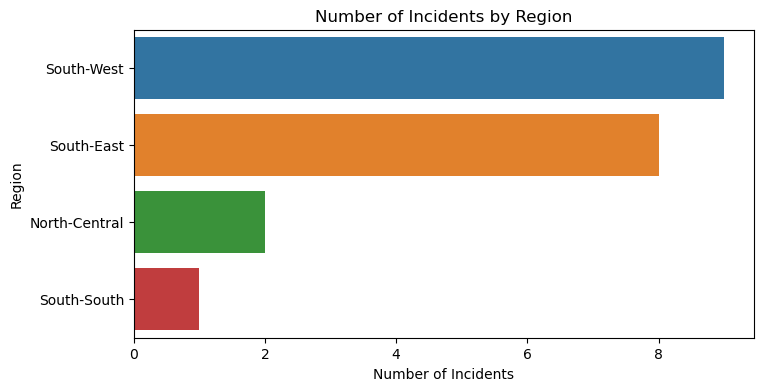

In [15]:
# Displaying the results
print("\n2. Geographical Analysis:")
print("Incidents by State:\n", incidents_by_state)
print("\nIncidents by Region:\n", incidents_by_region)

# Incidents by State
plt.figure(figsize=(8, 4))
sns.barplot(x=incidents_by_state.values, y=incidents_by_state.index)
plt.title('Number of Incidents by State')
plt.xlabel('Number of Incidents')
plt.ylabel('State')
plt.xticks(rotation=0)
plt.show()

# Incidents by Region
plt.figure(figsize=(8, 4))
sns.barplot(x=incidents_by_region.values, y=incidents_by_region.index)
plt.title('Number of Incidents by Region')
plt.xlabel('Number of Incidents')
plt.ylabel('Region')
plt.xticks(rotation=0)
plt.show()

### 3. Market Type Analysis:

- What types of markets are most commonly affected by fires?
- Are certain market types more prone to fire incidents compared to others?


3. Market Type Analysis:
General Goods        10
Timber Market         4
Spare Parts           2
Roadside Shops        1
Furniture Market      1
Electronic Parts      1
Name: Type of Market, dtype: int64


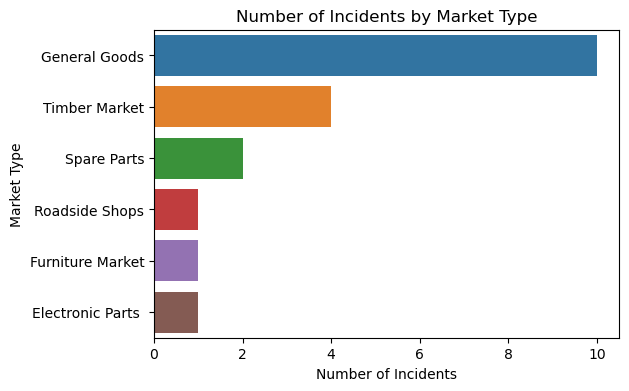

In [16]:
# 3. Market Type Analysis
# Number of incidents by type of market
incidents_by_market_type = df['Type of Market'].value_counts()

# Displaying the results
print("\n3. Market Type Analysis:")
print(incidents_by_market_type)

# Market Type Analysis - Incidents by Market Type
plt.figure(figsize=(6, 4))
sns.barplot(x=incidents_by_market_type.values, y=incidents_by_market_type.index)
plt.title('Number of Incidents by Market Type')
plt.xlabel('Number of Incidents')
plt.ylabel('Market Type')
plt.xticks(rotation=0)
plt.show()

### 4. Causes of Fire Analysis:

- What are the primary reported causes of market fires?
- Are there any recurring causes of fire incidents?


4. Causes of Fire Analysis:
Unknown                                                                           8
Generator Fire                                                                    3
Electrical - Power Surge/Power Restoration                                        3
Refuse Fire                                                                       1
Electrical - Power Surge/Power Restoration, Bush Fire                             1
Electrical - Power Surge/Power Restoration, Bush Fire, Unattended Gas Cylinder    1
Illegal Bush fire                                                                 1
Name: Reported Causes, dtype: int64


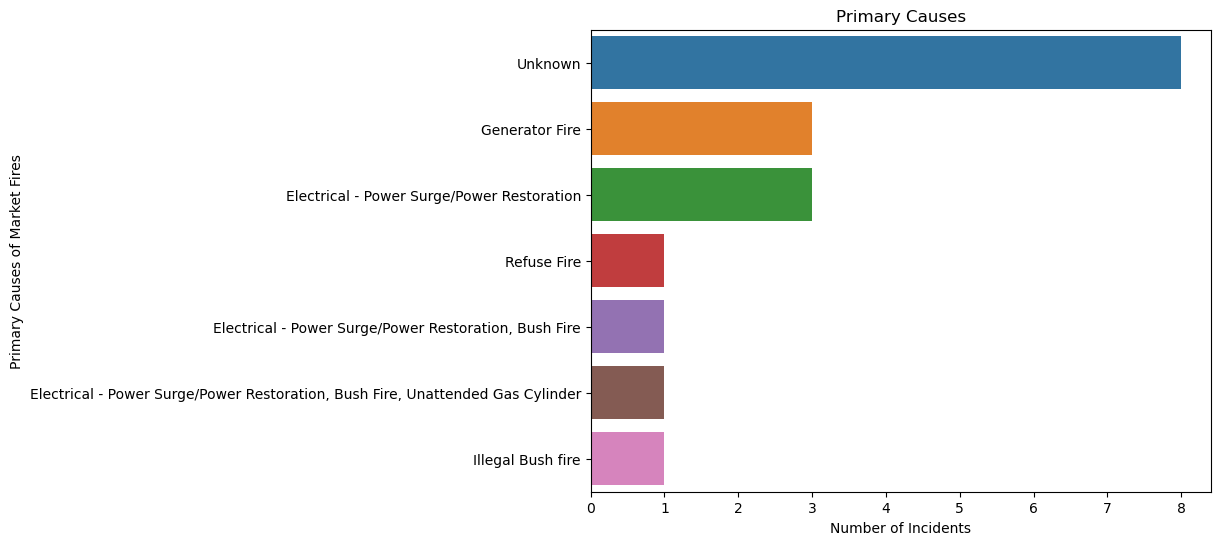

In [17]:
# 4. Causes of Fire Analysis
# Primary reported causes of market fires
primary_causes = df['Reported Causes'].value_counts()

# Displaying the results
print("\n4. Causes of Fire Analysis:")
print(primary_causes)


#visualization - Primary Causes
plt.figure(figsize=(8, 6))
sns.barplot(x=primary_causes.values, y=primary_causes.index)
plt.title('Primary Causes')
plt.xlabel('Number of Incidents')
plt.ylabel('Primary Causes of Market Fires')

plt.show()

### 5. Response and Damage Assessment:

- How effective is the response in extinguishing fires?
- What is the estimated loss in monetary terms due to each fire incident?


5. Response and Damage Assessment:
Response Effectiveness:
 Firefighters    17
Traders          1
Army             1
Name: Fire put out by, dtype: int64
Total Estimated Loss (N):  Undisclosed 10,000,000.00 Undisclosed  Undisclosed 20,000,000,000.00 Undisclosed  Undisclosed 25,000,000.00 Undisclosed  Undisclosed  Undisclosed  Undisclosed  Undisclosed 400,000,000.00 Undisclosed  Undisclosed  Undisclosed  Undisclosed  Undisclosed 8,000,000.00


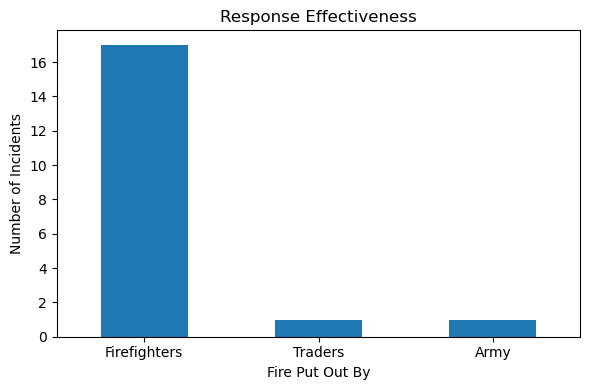

In [18]:
# 5. Response and Damage Assessment
# Response effectiveness and estimated loss
response_effectiveness = df['Fire put out by'].value_counts()
# Handle missing values in 'Estimated Loss (#)' and compute sum
estimated_loss = df['Estimated Loss NGN'].fillna(0).sum()

# Displaying the results
print("\n5. Response and Damage Assessment:")
print("Response Effectiveness:\n", response_effectiveness)
print("Total Estimated Loss (N):", estimated_loss)

# Visualisation 
plt.figure(figsize=(6, 4))
response_effectiveness.plot(kind='bar')
plt.title('Response Effectiveness')
plt.xlabel('Fire Put Out By')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 6. Safety Measures:

- How frequently are fire extinguishers effectively used during fire incidents?
- Are there any notable incidents where the use of fire extinguishers contributed to mitigating fire damage?


6. Safety Measures:
No     15
Yes     1
Name: Effective Use of Fire Extinguishers, dtype: int64


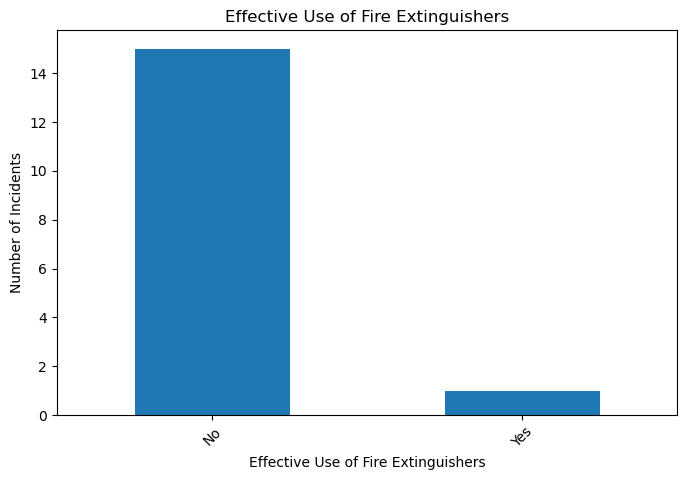

In [19]:
# 6. Safety Measures
# Frequency of fire extinguisher usage
extinguisher_usage = df['Effective Use of Fire Extinguishers'].value_counts()

print("\n6. Safety Measures:")
print(extinguisher_usage)

# Safety Measures - Fire Extinguisher Usage
plt.figure(figsize=(8, 5))
extinguisher_usage.plot(kind='bar')
plt.title('Effective Use of Fire Extinguishers')
plt.xlabel('Effective Use of Fire Extinguishers')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

### 7. Fatalities and Looting Analysis:

- How many incidents resulted in fatalities or casualties?
- Is there a correlation between incidents involving looting and the severity of fire damage?


In [20]:
# 7. Fatalities and Looting Analysis
# Incidents resulting in fatalities or casualties
fatalities_count = df['Fatalities'].notnull().sum()
looting_count = df['Looting'].notnull().sum()

# Displaying the results
print("\n7. Fatalities and Looting Analysis:")
print("Incidents resulting in fatalities:", fatalities_count)
print("Incidents involving looting:", looting_count)


7. Fatalities and Looting Analysis:
Incidents resulting in fatalities: 19
Incidents involving looting: 19


### 8. Longitudinal Analysis:

- Are there any trends or changes in the frequency or severity of market fire outbreaks over time?
- Have any preventive measures been implemented in response to previous incidents, and have they been effective?



8. Longitudinal Analysis:
Date of Fire
2019-12     1
2020-01    10
2020-02     9
Freq: M, Name: Market Name, dtype: int64


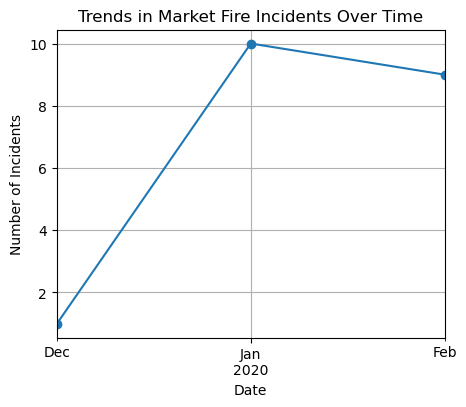

In [21]:
# 8. Longitudinal Analysis
# Trends in frequency and severity over time
trends_over_time = df.groupby(df['Date of Fire'].dt.to_period('M'))['Market Name'].count()

# Displaying the results
print("\n8. Longitudinal Analysis:")
print(trends_over_time)


# Visual- Longitudinal Analysis - Trends Over Time
plt.figure(figsize=(5, 4))
trends_over_time.plot(kind='line', marker='o')
plt.title('Trends in Market Fire Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

### 9. Media Coverage and Reporting:

- What is the extent of media coverage for each fire incident?
- Are there any discrepancies between reported incidents and actual occurrences?

In [22]:
# 9. Media Coverage and Reporting
# Extent of media coverage and discrepancies
media_coverage = df['Src'].notnull().sum()
discrepancies_count = df['Recurring?'].notnull().sum()

# Displaying the results
print("\n9. Media Coverage and Reporting:")
print("Media coverage count:", media_coverage)
print("Discrepancies count:", discrepancies_count)


9. Media Coverage and Reporting:
Media coverage count: 19
Discrepancies count: 19


### 10. Insurance and Compensation:

- How many affected markets were covered by insurance, and what was the extent of compensation received?
- What are the challenges faced by market owners in securing insurance coverage and compensation for fire damage?

In [23]:
# 10. Insurance and Compensation
# Incidents covered by insurance and compensation details
insurance_coverage_count = df['Estimated Loss NGN'].notnull().sum()
compensation_amount = df['Estimated Loss NGN'].sum()

# Displaying the results
print("\n10. Insurance and Compensation:")
print("Incidents covered by insurance:", insurance_coverage_count)


10. Insurance and Compensation:
Incidents covered by insurance: 20


## Key Findings:

1. **Temporal Analysis:**
   - Market fire outbreaks occurred over a span of three months, with a notable increase in incidents from January to February 2020.

2. **Geographical Analysis:**
   - Most incidents were concentrated in states within the South-West and South-East regions, indicating geographical hotspots for market fire outbreaks.

3. **Market Type Analysis:**
   - General goods markets were the most frequently affected, followed by timber markets and spare parts markets. Understanding the vulnerability of different market types is essential for targeted interventions.

4. **Causes of Fire Analysis:**
   - Primary reported causes included unknown factors, generator fires, and electrical issues. Identifying the root causes can help implement preventive measures and improve fire safety protocols.

5. **Response and Damage Assessment:**
   - Firefighters were the primary responders to most incidents, emphasizing the importance of efficient emergency response systems. However, the total estimated loss varied widely across incidents, with many cases reporting undisclosed losses.

6. **Safety Measures:**
   - Effective use of fire extinguishers was limited, indicating potential gaps in fire safety preparedness and training among market stakeholders.

7. **Fatalities and Looting Analysis:**
   - Fortunately, most incidents did not result in fatalities or involve looting. However, ensuring the safety of market occupants remains a priority.

8. **Longitudinal Analysis:**
   - The longitudinal trend shows fluctuations in the number of incidents over time, highlighting the dynamic nature of market fire outbreaks.

9. **Media Coverage and Reporting:**
   - Media coverage of incidents was extensive, but discrepancies in reporting were identified, indicating the need for accurate and transparent reporting mechanisms.

## Recommendations:

1. Enhance Fire Safety Protocols:
   - Implement regular fire safety drills and training sessions for market occupants.
   - Ensure proper installation and maintenance of fire detection and suppression systems.

2. Improve Emergency Response:
   - Strengthen collaboration between market associations, local authorities, and emergency responders to enhance response time and effectiveness.

3. Conduct Risk Assessments:
   - Conduct comprehensive risk assessments to identify potential fire hazards and implement preventive measures accordingly.

4. Foster Stakeholder Engagement:
   - Engage with market stakeholders to raise awareness about fire safety practices and encourage active participation in risk mitigation efforts.

5. Enhance Data Collection and Reporting:
   - Improve data collection processes to ensure accurate and consistent reporting of market fire incidents, facilitating better analysis and decision-making.

## Conclusion:

Market fire outbreaks pose significant challenges to the safety and sustainability of our communities. By understanding the underlying factors contributing to these incidents and implementing targeted interventions, stakeholders can work together to mitigate risks, enhance emergency response capabilities, and safeguard the well-being of market occupants and assets.

This report serves as a starting point for collaborative efforts to address market fire safety concerns and build more resilient market environments. Together, we can create safer and more sustainable markets for the benefit of all stakeholders involved.